In [3]:
# ls *.csv

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
raw = pd.read_csv('MKTCAP_GR.csv', encoding = 'cp932').dropna()
raw.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,2HRA,0.000,43.9143,3.2794,3.2482,34.0403,4.4293,1.0819,17.3527,...,11.8415,-9.3213,14.6434,17.1636,0.191067,inf,inf,0.133741,-0.792145,0.000
1,2000,A1OS,0.000,40.9510,0.2350,-0.7530,44.2850,1.7340,4.4300,19.6690,...,13.5050,-12.8700,12.8810,13.5160,0.017387,inf,inf,0.008256,0.183450,0.000
2,2000,AAA,0.000,10.9207,3.0013,2.0257,83.9710,0.0793,0.0000,0.0000,...,-0.0793,8.0549,78.5441,86.5197,0.034689,inf,inf,0.035742,0.064360,0.000
3,2000,AAD,91.902,34.2833,4.7588,2.6313,24.5565,17.7117,0.0000,21.2303,...,3.5186,-5.9551,1.2367,-1.1998,-3.966328,0.051781,-3.517914,0.280107,0.064143,91.902
4,2000,AAH,0.000,379.5033,31.3202,14.7845,264.9924,20.2257,0.9137,158.0551,...,136.9157,-43.4373,43.3560,136.8344,0.228891,inf,inf,0.149144,0.396824,0.000


In [3]:
## any company with zero MKTCAP

zeromc = raw[raw['MKTCAP'] == 0]
print (zeromc.shape[0])

# remove the comapnies with zero MKTCAP
raw2 = raw[raw['MKTCAP'] != 0]

raw2[raw2['MKTCAP'] == 0]

3290


,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP


In [4]:
# raw.groupby('ddate').count()

In [21]:
## deal with time - only consider one year 2014 first. Feature from 2014 and MKTCAP in 2015   

# remove all zero columns. i.e. keep columns that have more than one zero values 
data = raw2.loc[:, (raw2 != 0).any(axis = 0)]

# only keep the companeis that exist in both 2014 and 2015
x_2014= data[data['ddate'] == 2014].drop('MKTCAP', axis = 1)
y_2015 = data[data['ddate'] == 2015][['security_code','MKTCAP']]

data2 = pd.merge(x_2014, y_2015, how = 'inner', on = ['security_code'])
print (data2.shape)

# get feature dataframe and dependent variable dataframe 
x = data2.loc[:, '売上':'使用資産']
 
y = data2.loc[:, 'MKTCAP']


(271, 65)


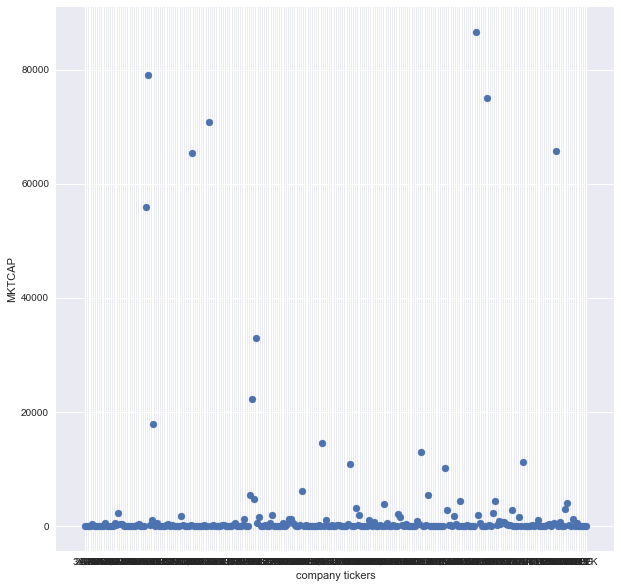

In [18]:
### scatter plot of companies and their corresponding MKTCAP (2014, 2015)

fig = plt.figure(figsize = (10, 10))

num = len(data2['security_code'])
x_plot = np.arange(num)
y_plot = data2['MKTCAP']
my_xticks = list(data2['security_code'].values)

plt.xticks(x_plot, my_xticks)
plt.scatter(x_plot, y_plot)

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [22]:
data2['MKTCAP'].describe()

count      271.000000
mean      2723.937347
std      11714.105797
min          0.165000
25%         13.784885
50%         58.970100
75%        369.758614
max      86647.190018
Name: MKTCAP, dtype: float64

In [8]:
# look into companies with MKTCAP greater than 10000
# ALLDF['MKTCAP'] = ALLDF['時価総額']*(ALLDF['発行済株式数'] - ALLDF['自己株式数']) / ALLDF['発行済株式数']
# this adjusted MKTCAP is saved to csv and used as dependent variable here 

print (data2.shape[0])
data2[data2['MKTCAP'] > 1000]['security_code']

mega = data2[data2['MKTCAP'] > 1000][['security_code', '時価総額', 'MKTCAP']]
print (mega.shape[0])
mega.head()

271
46


,security_code,時価総額,MKTCAP
18,AFX,1668.9609,2230.973000
33,BAS,78409.6111,55934.432700
34,BAYN,108753.5797,79066.134100
36,BDT,1166.9798,1098.651052
37,BEI,18984.6716,17815.017820


In [9]:
## consider about building two models; one for the few mega companies, the other for relatively regular companies 

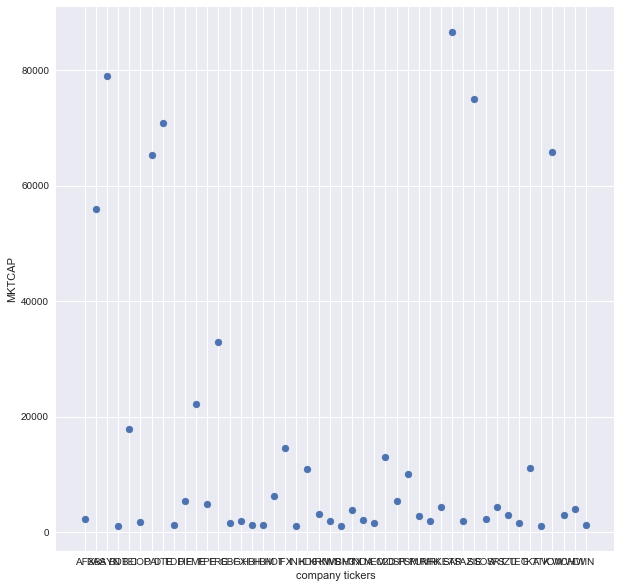

In [17]:
### scatter plot of megea companies and their corresponding MKTCAP (2014, 2015)

fig = plt.figure(figsize = (10, 10))

num = len(mega['security_code'])
x_plot = np.arange(num)
y_plot = mega['MKTCAP']
my_xticks = list(mega['security_code'].values)

plt.xticks(x_plot, my_xticks)
plt.scatter(x_plot, y_plot)

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

### pearson correlation coefficients r assumptions
- normally distributed data, at least approximatly 
- homoscedasticity of data 
- outlisers should be adjusted as the test is sensitive to outliers 
- data should be either interval or ratio measurements
- the underlying relationship between the two variables should be linear  

-- variables do not have to be of the same unit. i.e. the test can be used to measure correlaion bewteen age and blood pressure 

### use the pearson r to check if the data fields are linearly correlated
- this test does not imply causality 

### Spearman correlation 
turns out the data does not follow the normality assumption, use more robust correlation test
- The Spearman correlation is a nonparametric measure of the linear relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. 
- Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [103]:
from scipy.stats.mstats import spearmanr as spearmanr

# complete set of data 

num = len(x.columns)
# matrix of test of correlation 
corr = np.zeros((x.shape[1], x.shape[1]))
# matrix of test of p-value
pmat = np.zeros((x.shape[1], x.shape[1]))

for i in range(num):
    for j in range(num):
        corr[i, j] = spearmanr(x.loc[:, x.columns[i]], x.loc[:, x.columns[j]]).correlation
        pmat[i, j] = spearmanr(x.loc[:, x.columns[i]], x.loc[:, x.columns[j]]).pvalue
        

In [100]:
# mega comapny data 
mega = data2[data2['MKTCAP'] > 1000]

In [107]:
# matrix of p-values 
# varibales that are not correlated should ahve p-vlaues greater than 0.05 
# sum(pmat > 0.05)

# for each row, number of p-values greater than 0.05, numebr of variables that are NOT correlated with the row variable  
print (np.sum((pmat > 0.05), axis = 1))
# sure they are the same. the matrix is symmetric along the diagonal
np.sum((pmat > 0.05), axis = 0)

unco = np.sum((pmat > 0.05), axis = 1)

# row variable names with the higher amount of UNcorrelated variables 
print (len(x.columns))
x.columns[unco > 22]

[ 7  5  7  6  6  9  7  8  7  3  7  6  2 35 45 44  6  6 33  5  7  6  3  3  7
  6  3  5  7 27  4 22  5  9  7  4  5  9  5  6  4  3  3  6  5  6 52  7 42  7
  9 25  4  6  7  6]
56


Index(['未払税金', '短期繰延税金資産', '長期貸付金', '土地2', '未払費用', '自己資本その他', '販管費', '純現金資産'], dtype='object')

In [105]:
# variables correlated with each outher  
np.sum((pmat < 0.05), axis = 1)

array([49, 51, 49, 50, 50, 47, 49, 48, 49, 53, 49, 50, 54, 21, 11, 12, 50,
       50, 23, 51, 49, 50, 53, 53, 49, 50, 53, 51, 49, 29, 52, 34, 51, 47,
       49, 52, 51, 47, 51, 50, 52, 53, 53, 50, 51, 50,  4, 49, 14, 49, 47,
       31, 52, 50, 49, 50])

## how to tackle multicollinearity
## multicollinearity and LASSO

### approximate normality
- histogram of the variables
- scipy.stats.kstest for two sided  Kolmogorov-Smirnov test for goodness of fit

In [24]:
x.columns

Index(['売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産', '総長期投資',
       '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産', '長期貸付金',
       '従業員数', '売上総利益', '土地2', '売掛金', '棚卸', '買掛金', 'のれん･営業権', '貸倒引当金', '剰余金',
       '資本金', '売上原価', '負債合計', '自己資本', '未払費用', '長期繰延税金負債', '長期借入金(当期返済分)',
       '少数持分', '自己株金額', '人件費', '税引前利益', '非流動資産合計', '自己株式数', '発行済株式数',
       '流動資産その他', '投資資産', '無形資産その他', '投資資産その他', '流動負債その他', '固定負債', '固定負債その他',
       '自己資本その他', '株主資本', '販管費', '売上総利益率', '営業利益率', '純現金資産', '営業資産', '営業負債',
       '有形固定', '使用資産'],
      dtype='object')

### Normality 

In [25]:
from scipy import stats 

## none of the variables are actually noramlly distributed, probably due to the outliers  

# two sided ks test for all data fields
for i in range(x.shape[1]):

    print (stats.kstest(x.iloc[:, i], 'norm', alternative='two-sided'))

KstestResult(statistic=0.91392885933899781, pvalue=0.0)
KstestResult(statistic=0.53810777610904781, pvalue=0.0)
KstestResult(statistic=0.42848045225222553, pvalue=0.0)
KstestResult(statistic=0.95691637809805707, pvalue=0.0)
KstestResult(statistic=0.68912170673971951, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.87835184050884507, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.67761722253998724, pvalue=0.0)
KstestResult(statistic=0.51294556365942601, pvalue=0.0)
KstestResult(statistic=0.56883607694190086, pvalue=0.0)
KstestResult(statistic=0.83950428135695077, pvalue=0.0)
KstestResult(statistic=0.58996821262253607, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.92985762765115587, pvalue=0.0)
KstestResult(statistic=0.49261992619926198, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.6822552

In [26]:
# study the relative values of the statistics, group them and study hte corresponding variables ?

### Summary Statistics

In [49]:
# any data fields/ columns with negative values 

x = data2.loc[:, '売上':'使用資産']
y = data2.loc[:, 'MKTCAP']

data2.loc[:, '売上':'使用資産'].columns[(data2.loc[:, '売上':'使用資産'] < 0).any(axis = 0)]

Index(['営業利益', '純利益', '売上総利益', '貸倒引当金', '剰余金', '売上原価', '自己資本', '少数持分', '自己株金額',
       '人件費', '税引前利益', '流動資産その他', '投資資産', '投資資産その他', '流動負債その他', '固定負債その他',
       '自己資本その他', '株主資本', '販管費', '売上総利益率', '営業利益率', '純現金資産', '営業資産', '営業負債',
       '使用資産'],
      dtype='object')

In [52]:
# mean and variance for each data fields

print (np.mean(x, axis = 0))

売上               3057.080892
営業利益              245.474306
純利益               168.424075
総資産              4488.682759
現金･現金同等物          283.548746
有価証券               94.012504
流動資産             1683.240739
総長期投資             467.338972
有形固定資産            922.562942
短期借入金             454.933175
長期借入金            1011.453511
流動負債             1401.166438
無形資産             1025.689268
未払税金                0.041295
短期繰延税金資産            2.322470
長期貸付金               0.224875
従業員数            10569.099631
売上総利益             736.190614
土地2                 2.629742
売掛金               667.135163
棚卸                435.690765
買掛金               309.049764
のれん･営業権           551.860806
貸倒引当金             -15.615706
剰余金               760.538892
資本金               535.968935
売上原価             -452.769693
負債合計             3138.444337
自己資本             1349.603889
未払費用                0.346527
長期繰延税金負債           83.282887
長期借入金(当期返済分)        4.038228
少数持分               79.947181
自己株金額             -26.898820
人件費           

In [53]:
# varince for all data fields 

print (np.var(x, axis = 0))

売上              2.776059e+08
営業利益            1.657006e+06
純利益             9.346157e+05
総資産             7.285484e+08
現金･現金同等物        2.261173e+06
有価証券            6.315647e+05
流動資産            1.021746e+08
総長期投資           2.065486e+07
有形固定資産          2.812307e+07
短期借入金           1.828184e+07
長期借入金           3.626036e+07
流動負債            8.944936e+07
無形資産            3.288293e+07
未払税金            2.158005e-01
短期繰延税金資産        7.550163e+02
長期貸付金           3.602421e+00
従業員数            2.578928e+09
売上総利益           1.498106e+07
土地2             1.083008e+03
売掛金             1.831505e+07
棚卸              6.943591e+06
買掛金             2.681790e+06
のれん･営業権         8.432835e+06
貸倒引当金           9.806233e+03
剰余金             3.833971e+07
資本金             1.676357e+07
売上原価            6.145792e+06
負債合計            3.979778e+08
自己資本            5.153378e+07
未払費用            1.401875e+01
長期繰延税金負債        3.533151e+05
長期借入金(当期返済分)    2.251959e+03
少数持分            4.566243e+05
自己株金額           6.101172e+04
人件費           

In [60]:
# mean and variance for each data fields after standerdization of the independent variables
# create a new df to store the standerdized variables

from sklearn.preprocessing import scale 

stdx = scale(x)
stdx = pd.DataFrame(stdx, index = x.index, columns = x.columns)

# mean and varince should be 0 and 1 after standerdization 
# print (np.mean(stdx, axis = 0))
# print (np.var(stdx, axis = 0))

In [59]:
from scipy import stats 

# standersization does not change the distribution of the data. 
# they are still not normality distributed

# two sided ks test for all data fields
for i in range(stdx.shape[1]):

#     print (stats.kstest(stdx.iloc[:, i], 'norm', alternative='two-sided'))

SyntaxError: unexpected EOF while parsing (<ipython-input-59-d9e72d54f25c>, line 8)

### check for outliers for pearson correlation coefficient r test 
- scatter plot between each pair of the data fields variables 
- quantile plots with whisk from Tukey for each single data field variable 

In [27]:
# japanese characters do not shown as labels on matplotlib; rename columns
x.columns = [ 'v' + str(i) for i in range(1, x.shape[1] + 1)]

In [29]:
# mapping 
num = np.array(x.columns)
name = np.array(data2.loc[:, '売上': '使用資産'].columns)

# to map  ['v1', 'v5', 'v28', 'v55'] in the plot back

name[[0, 6, 10, 16]]

array(['売上', '流動資産', '長期借入金', '従業員数'], dtype=object)

In [54]:
# ## scatter plots for all pairs of variebls on different figs
# num = len(x.columns)

# # fig = plt.figure(figsize = (10, 10))

# for i in range(num):
#     for j in range(num):
#         plt.figure()
#         plt.scatter(x.iloc[:, i], x.iloc[:, j]) 
#         plt.xlabel(x.columns[i])
#         plt.ylabel(x.columns[j])
#         plt.savefig('{} and {} scatter plot'.format(i, j))
# # plt.show()

In [30]:
plotda = data2[data2['MKTCAP'] < 1000]

x = plotda.loc[:, '売上':'使用資産'] 
y = plotda.loc[:, 'MKTCAP']

x.columns = [ 'v' + str(i) for i in range(1, x.shape[1] + 1)]

x.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51',
       'v52', 'v53', 'v54', 'v55', 'v56'],
      dtype='object')

In [16]:
pwd

'C:\\Users\\1098071\\Documents\\RF'

In [31]:
## scatter plots for  pairs of variables without mega comapnies on differen figs
num = len(x.columns)

# fig = plt.figure(figsize = (10, 10))

for i in range(num):
    for j in range(num):
        plt.figure()
        plt.scatter(x.iloc[:, i], x.iloc[:, j]) 
        plt.xlabel(x.columns[i])
        plt.ylabel(x.columns[j])
        plt.savefig('C:\\Users\\1098071\\Documents\\RF\\figs\\' + '{} and {} scatter plot'.format(i, j))
# plt.show()

In [56]:
## quantiles 

def outliers(x):
    quantile_1, quantile_3 = np.percentile(x, [25, 75])
    iqr = quantile_3 - quantile_1
    lower = quantile_1 - (iqr * 1.5)
    upper = quantile_3 + (iqr * 1.5)
    
#     if (np.where((x > upper) | (x < lower))) != 0:
#         return 1 
    return np.where ((x > upper) | (x  < lower))

In [57]:
var_outliers = []
for i in range(len(data.columns)):
    var_outliers.append(outliers(data.iloc[:, i])) 

[(array([  25,   43,   66, ..., 7284, 7285, 7286], dtype=int64),),
 (array([  13,   25,   29, ..., 7284, 7285, 7286], dtype=int64),),
 (array([  10,   13,   14, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  10,   13,   14, ..., 7282, 7283, 7286], dtype=int64),),
 (array([  13,   25,   29, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  10,   25,   29, ..., 7282, 7284, 7286], dtype=int64),),
 (array([  10,   11,   13, ..., 7283, 7285, 7286], dtype=int64),),
 (array([  13,   25,   29, ..., 7284, 7285, 7286], dtype=int64),),
 (array([  10,   17,   21, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  21,   25,   29, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  13,   21,   29, ..., 7279, 7284, 7286], dtype=int64),),
 (array([  13,   21,   29, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  13,   21,   25, ..., 7283, 7284, 7286], dtype=int64),),
 (array([  25,   30,   56, ..., 7279, 7284, 7286], dtype=int64),),
 (array([1455, 1466, 1828, 1839, 2675, 3404, 3478, 3551, 3559,